# Final Exam Coding in AI [1/2023]


นาย สัณหณัฐ พรมจรรย์, 63070501069<br>

**Note: Please name your file with your student ID**

## Instructions:

1. This exam has only one question that is worth 20 points.</br>
2. In this exam, you have to train a neural network model using the Keras library with Tensorflow backend. Your task is to **build a classifier that can predict the catagory of each news item based on the headline**.
3. The dataset can be downloaded form this folder:
https://drive.google.com/file/d/1a8Qi2jxpLWhgckJhQb1v5_Ble57GHE2n/view?usp=drive_link</br>
4. You can use any library for data preprocessing. Pre-trained models can also be used.</br>
5. Use 5-10 epochs to train your model.</br>
6. Use the template below to build your model. Feel free to add/remove/move cells. </br>
7. Your file **MUST be submitted to LEB2 before 4pm**.</br>
8. If your have any concerns/assumptions, please note them in the comments.


**The total exam score is 20 points, which will be evaluated based on the following criteria:**</br>
1. Model design logic (No weird things in the process) - 5 points
2. Coding (How you build the model) - 5 points
3. Journaling (Communicate your thought process, comment on your code, and discuss and analyze the results **at every step**) - 10 points


### *** If you borrow a part of the code from somewhere, show me your references! ***
If you don’t give references and I found it somewhere, it will be considered CHEATING!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from keras import models
from keras import layers

from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [3]:
from keras import *
from keras.preprocessing import text
from keras.preprocessing import sequence

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

**อ้างอิงจาก Lab5_Homework ในคาบเรียนา**

In [5]:
# define a function to plot the result from training step
def show_result(history):

    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['accuracy'][-1])
    print('Last validation accuracy: %s'%history.history['val_accuracy'][-1])

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(loss) + 1)

    # Define a subplot
    fig, axs = plt.subplots(1,2,figsize=(15,4))

    # Plot loss
    loss_plot = axs[0]

    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()

    # Plot accuracy
    acc_plot = axs[1]

    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

# Define an evaluation function to print the evaluation result
def evaluation_report(model,features,labels):

    # Calculate result
    result = model.evaluate(features,labels,verbose=False)

    # Predict and convert into a class
    pred_class = model.predict(features).argmax(axis=1)

    # Show report
    print(confusion_matrix(labels,pred_class))
    print(classification_report(labels,pred_class))
    print("Loss: %s Accuracy: %s" %(result[0],result[1]))

    return pred_class

In [6]:
def evaluation_report(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Print classification report
    print(classification_report(y_test, y_pred_classes, zero_division=1))

#### 1. Load your data


In [7]:
# import data
df = pd.read_csv('/content/final-exam-data.csv')
df.describe()

,Headline,Category
count,6274,4755
unique,6234,7
top,What To Watch On Amazon Prime That\u2019s New ...,POLITICS
freq,9,2397


In [8]:
df.head()

,Headline,Category
0,Memphis Police: Arrest Made In Jogger's Disapp...,CRIME
1,Officials: NH Missing Girl Case Shifts To Homi...,CRIME
2,Albuquerque Police Share Photo Of Car Eyed In ...,CRIME
3,Albuquerque Police Tell Muslim Community To Be...,CRIME
4,University of West Georgia Professor Charged W...,CRIME


In [9]:
# ลบแถวที่มี Category เป็น NaN เนื่องจากตอนแรกที่เช็คใน Category จะมี nan อยู่
df = df.dropna(subset=['Category'])

In [10]:
# ต้องการดูว่ามี Category กี่ชนิด
category = df['Category'].unique()
print("Category:", category)

Category: ['CRIME' 'ENTERTAINMENT' 'POLITICS' 'SPORTS' 'TECH' 'WEIRD NEWS'
 'WORLD NEWS']


#### 2. Data preprocessing

**อ้างอิงจาก Neuron+Network+Lab ในคาบเรียน**

In [11]:
#Binary encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Category'] = le.fit_transform(df['Category'])

df.head()

<ipython-input-11-852b1f7af783>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = le.fit_transform(df['Category'])


,Headline,Category
0,Memphis Police: Arrest Made In Jogger's Disapp...,0
1,Officials: NH Missing Girl Case Shifts To Homi...,0
2,Albuquerque Police Share Photo Of Car Eyed In ...,0
3,Albuquerque Police Tell Muslim Community To Be...,0
4,University of West Georgia Professor Charged W...,0


In [12]:
x = df['Headline'].values
y = df['Category'].values

In [13]:
x[0]

"Memphis Police: Arrest Made In Jogger's Disappearance"

In [14]:
y[0]

0

In [15]:
# ต้องการดูว่ามี Category กี่ชนิด
categories = df['Category'].unique()
print("Categories:", categories)

Categories: [0 1 2 3 4 5 6]


##### Split train-test-validate sets

**อ้างอิงจาก Lab6_RNN_inClass ในคาบเรียน**

In [16]:
# Split train & test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.1,stratify=y,random_state=0) # ได้ทดลองเปลี่ยน test_size =0.2
# Split train validate sets
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size =0.1,stratify=y_train,random_state=0) # ได้ทดลองเปลี่ยน test_size =0.2

Text(0.5, 1.0, 'y val')

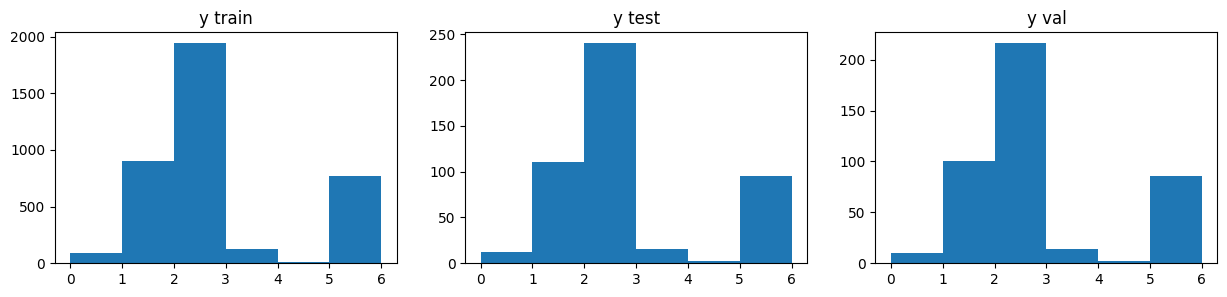

In [17]:
# Plot the target distributions
fig,ax =plt.subplots(1,3,figsize=(15,3))

bins = [0,1,2,3,4,5,6]

ax[0].hist(y_train,bins=bins)
ax[0].set_title('y train')
ax[1].hist(y_test,bins=bins)
ax[1].set_title('y test')
ax[2].hist(y_val,bins=bins)
ax[2].set_title('y val')

**อ้างอิงจาก Lab6_RNN_inClass ในคาบเรียน**

In [18]:
# Define parameter
max_word = 1000
maxlen = 20
max_features = 1000

In [19]:
# Define Tokenizer
tokenizer = text.Tokenizer(num_words = max_word) #define corpus to keep the maximum number of words
tokenizer.fit_on_texts(x_train)

In [20]:
tokenizer.word_index

{'to': 1,
 'in': 2,
 'of': 3,
 'trump': 4,
 'for': 5,
 'the': 6,
 'on': 7,
 'a': 8,
 'with': 9,
 'after': 10,
 'and': 11,
 'at': 12,
 'is': 13,
 'u2019': 14,
 'as': 15,
 'u2019s': 16,
 'new': 17,
 'says': 18,
 'biden': 19,
 'over': 20,
 'about': 21,
 'from': 22,
 'his': 23,
 's': 24,
 'u': 25,
 "trump's": 26,
 'gop': 27,
 'covid': 28,
 'that': 29,
 'her': 30,
 'house': 31,
 'donald': 32,
 'by': 33,
 '19': 34,
 'he': 35,
 'will': 36,
 'coronavirus': 37,
 'be': 38,
 'out': 39,
 'are': 40,
 'first': 41,
 'up': 42,
 'it': 43,
 'who': 44,
 'twitter': 45,
 'joe': 46,
 'was': 47,
 'has': 48,
 'what': 49,
 'this': 50,
 'election': 51,
 'white': 52,
 'democrats': 53,
 'how': 54,
 'report': 55,
 'calls': 56,
 'fox': 57,
 'court': 58,
 'death': 59,
 'against': 60,
 'not': 61,
 'ex': 62,
 'president': 63,
 'people': 64,
 'him': 65,
 'police': 66,
 'reveals': 67,
 'rep': 68,
 'news': 69,
 'have': 70,
 'she': 71,
 'video': 72,
 'amid': 73,
 'john': 74,
 'ukraine': 75,
 'republicans': 76,
 'man': 77,

In [21]:
tokenizer.num_words

1000

In [22]:
from keras.utils import pad_sequences

# Data preprocessing function
def preprocess_fn(data):
    sequences = tokenizer.texts_to_sequences(data)
    padding_sequences = pad_sequences(sequences,maxlen = maxlen)

    return padding_sequences,sequences

In [23]:
len(max(x_train, key=len))

117

In [24]:
# Preprocess data
x_train,sequences_x_train =  preprocess_fn(x_train)
x_val,sequences_x_val = preprocess_fn(x_val)
x_test,sequences_x_test = preprocess_fn(x_test)

In [25]:
x_train.shape

(3851, 20)

In [26]:
len(max(x_train, key=len))

20

In [27]:
x_train

array([[  0,   0,   0, ..., 443,  15,  43],
       [  0,   0,   0, ...,   1, 350,  55],
       [  0,   0,   0, ..., 350,   4,  39],
       ...,
       [  0,   0,   0, ...,   9, 735,  14],
       [  0,   0,   0, ..., 490, 701, 812],
       [  0,   0,   0, ...,  18,  35, 372]], dtype=int32)

In [28]:
sequences_x_train

[[67, 105, 651, 9, 223, 13, 744, 15, 443, 15, 43],
 [146, 3, 246, 106, 977, 37, 315, 1, 350, 55],
 [284, 350, 4, 39],
 [27, 262, 652, 28, 34, 112, 197],
 [130, 263, 59, 3, 855, 134, 856],
 [209, 5, 351, 169, 19, 40, 1, 30],
 [32, 4, 56, 113, 81, 122],
 [3, 33, 6, 48, 11, 13, 8, 588, 3],
 [27, 68, 8, 978, 979, 10, 285],
 [76, 15, 653, 405, 857, 518, 16, 33],
 [745, 286, 2, 85],
 [4, 25, 24, 11, 5, 224, 1, 87, 7, 287, 519],
 [654, 7, 655, 1, 980, 2, 352, 981],
 [57, 406, 288, 330, 56, 746, 82, 2, 37, 180, 407],
 [77, 247, 10, 378, 181, 248],
 [858, 982, 40, 116, 60, 4, 55],
 [4, 56, 747, 12, 983, 8],
 [379, 656, 1, 859, 99, 10],
 [17, 860, 289, 444, 95, 85, 1],
 [19, 18, 408, 13, 984, 2, 25, 24, 1, 331],
 [380, 748, 99, 3, 2, 17],
 [26, 861, 13, 20, 23, 36, 38, 445, 5],
 [4, 135, 316, 44, 1, 9, 136],
 [3, 92, 480, 78, 96, 53, 8, 481],
 [4, 21, 290],
 [85, 20, 1],
 [985, 589, 16, 100, 1, 39, 249, 20, 182, 480],
 [4, 317, 590, 5, 28, 34, 749],
 [3, 291, 264, 409, 9, 3],
 [122, 140, 986, 59

#### 3.Language model

**อ้างอิงจาก Lab6_RNN_inClass ในคาบเรียน โดยมีการใช้ ChatGPT ในคาบเรียน**

In [29]:
# Define model
rnn = models.Sequential()
rnn.add(layers.Embedding(max_features,32,input_length=maxlen))

rnn.add(layers.SimpleRNN(32))
rnn.add(layers.Dense(64,activation='elu'))
rnn.add(layers.Dense(7,activation='softmax'))

In [30]:
# Compile model
rnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
# Show model structure
rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 36647 (143.15 KB)
Trainable params: 36647 (143.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', verbose=1)

In [33]:
# Fit model
his =  rnn.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val,y_val), callbacks=[early_stop])

Epoch 1/10
121/121 [==============================] - 21s 128ms/step - loss: 1.2900 - accuracy: 0.5082 - val_loss: 1.2576 - val_accuracy: 0.4953
Epoch 2/10
121/121 [==============================] - 7s 57ms/step - loss: 0.9698 - accuracy: 0.6533 - val_loss: 0.9370 - val_accuracy: 0.6822
Epoch 3/10
121/121 [==============================] - 6s 53ms/step - loss: 0.7229 - accuracy: 0.7603 - val_loss: 0.8885 - val_accuracy: 0.6706
Epoch 4/10
121/121 [==============================] - 5s 39ms/step - loss: 0.5733 - accuracy: 0.8021 - val_loss: 0.8308 - val_accuracy: 0.7126
Epoch 5/10
121/121 [==============================] - 5s 44ms/step - loss: 0.4719 - accuracy: 0.8380 - val_loss: 0.8370 - val_accuracy: 0.7173
Epoch 6/10
121/121 [==============================] - 5s 45ms/step - loss: 0.3809 - accuracy: 0.8764 - val_loss: 0.8824 - val_accuracy: 0.7079
Epoch 7/10
121/121 [==============================] - 3s 23ms/step - loss: 0.3107 - accuracy: 0.8985 - val_loss: 0.9316 - val_accuracy: 0.73

Last train accuracy: 0.9535185694694519
Last validation accuracy: 0.6939252614974976


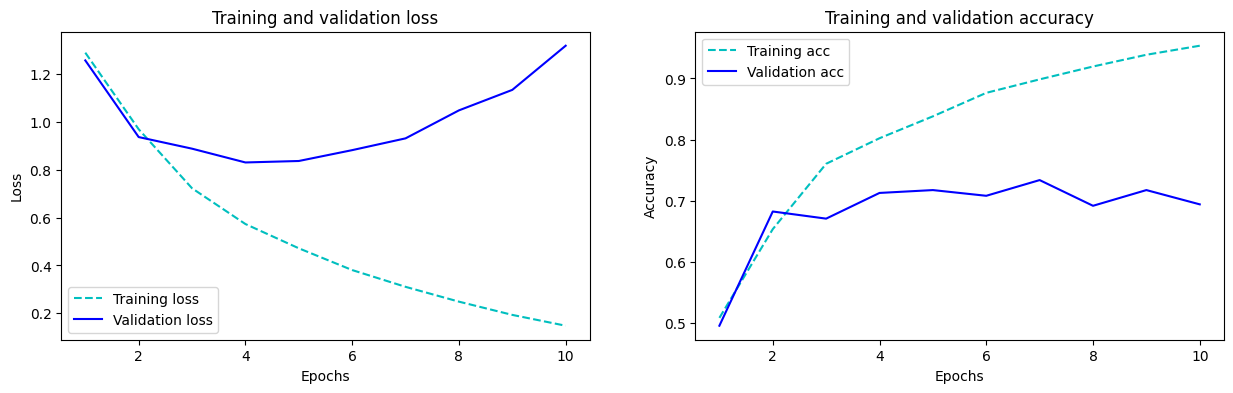

In [34]:
show_result(his)

#### 4. Evaluate your model

**อ้างอิงจาก Lab6_RNN_inClass ในคาบเรียน**

In [36]:
pred_class = evaluation_report(rnn,x_test,y_test)

15/15 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.57      0.77      0.65       111
           2       0.84      0.77      0.80       240
           3       0.55      0.38      0.44        16
           4       1.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       0.63      0.64      0.64        86

    accuracy                           0.70       476
   macro avg       0.60      0.40      0.41       476
weighted avg       0.71      0.70      0.70       476



#### 5. Discussion

เลือกใช้ Network Network เป็น RNN ซึ่งสามารถทำงานได้ดีในข้อมูลแบบ Text ที่จะคล้ายกับการทำงานเป็น Loop (นำข้อมูลก่อนหน้า มาหาต่อกับข้อมูลปัจจุบัน) และสามารถแก้ปัญหาแบบ Long Term ได้ดี สามารถรวบรวมบริบทจากคำรอบ ๆ มาเป็น feature ในการช่วย tag ได้

    โดยที่เลือก RNN เพราะง่ายและมีผลออกมาค่อนข้างดีหากเลือก Weight ดี แต่อาจใช้งานจริงไม่ได้เท่า LSTM(ดีกว่า)

ผลการทดลองจากการปรับ hyperparameter หลาย ๆ ค่า
1. คิดว่า max word กับ max feature ควรจะเท่ากัน ถ้าเกินจำนวนตรงนี้ต่างกันเยอะๆ จะทำให้ model ผิดพลาดเยอะ
เพราะการแบ่ง tokenization ออกมา 1000 คำ ใน model ก็ควรมี 1000 features แต่การลองปรับ ให้ word มากกว่า
หรือน้อยกว่า ก็ไม่ได้เห็นผลที่แย่กว่าเดิมขนาดนั้น และบางครั้งยังมีผลดีกว่า 1000 1000 ในบางรันด้วยซ้ำ
2. ชุดข้อมูล df['Category'] ที่ 4, 5 มีจำนวนข้อมูลที่น้อยมาก ๆ ทำให้โมเดลมีความไม่เข้าใจในบริบทที่เกี่ยวกับ TECH, WEIRD NEWS มากนัก
3. มีการลองเปลี่ยนจำนวน Train Test Val จาก Train,Test(90, 10) และ Train,Val(90, 10) เป็น Train,Test(80, 20) และ Train,Val(80, 20) โมเดลมีความเข้าใจในชุดข้อมูล df['Category'] ที่ 4, 5 หรือ TECH, WEIRD NEWS มากขึ้น แต่ validation มีค่าที่แย่ลง เนื่องจากชุดข้อมูลที่ใช้ train มีจำนวนที่น้อยลง ทำให้สามารถเข้าใจบริบทในแต่ละหมวดหมู่ได้ไม่มากนัก ทำให้ข้อมูล validation บางส่วนมีการที่จะไม่เรียนรู้มากขึ้น และจะเกิดการ Overfiting ได้
4. accuracy ของ train data มีค่าที่สูง และ loss ของ train data มีค่าที่ต่ำ แต่เนื่องจากชุดข้อมูลที่น้อยในบาง Category ทำให้ขั้นตอนการแบ่ง Test และ Val ที่มีผล accuracy ออกมาที่ต่ำลงเรื่อยๆ และ loss ก็มีค่าที่สูงขึ้นทำให้เกิดการ Overfiting ได้

# ### Try your model


In [37]:
# Define predict function
def predict_catNews(input_text,model):

    prepro_input = preprocess_fn([input_text])
    prepro_input = prepro_input[0]
    pred_class = model.predict(prepro_input).argmax(axis =1)

    label_to_News = ['CRIME', 'ENTERTAINMENT', 'POLITICS', 'SPORTS', 'TECH', 'WEIRD NEWS', 'WORLD NEWS'] # Your code goes here

    result = label_to_News[int(pred_class)]

    print('Catagory: %s\n%s'%(result,input_text))

In [38]:
# Test your model
input_text ='Hollywood A-Listers Gather for Star-Studded Awards Gala'
predict_catNews(input_text,rnn)

1/1 [==============================] - 0s 23ms/step
Catagory: ENTERTAINMENT
Hollywood A-Listers Gather for Star-Studded Awards Gala


In [39]:
# Test your model
input_text ='Olympic Gold Medalist Breaks World Record in Swimming'
predict_catNews(input_text,rnn)

1/1 [==============================] - 0s 22ms/step
Catagory: SPORTS
Olympic Gold Medalist Breaks World Record in Swimming


In [40]:
# Test your model
input_text ='Scientists Make Breakthrough in Quantum Computing Research'
predict_catNews(input_text,rnn)

1/1 [==============================] - 0s 21ms/step
Catagory: WORLD NEWS
Scientists Make Breakthrough in Quantum Computing Research


**1.What is your sentence?**

 - Scientists Make Breakthrough in Quantum Computing Research

**2.What category do you believe your sentence belongs in?**
- TECH

**3.What is your model's predicted news category?**
- WORLD NEWS


**4.Are the predicted result and your preferred response different or the same? What are your thoughts on why your network can or cannot produce accurate results? Do you have any ideas for improvements?**
- ผลลัพธ์ที่คิดไว้กับผลลัพธ์จากการทำนายมีความแตกต่างกัน เหตุผลที่โมเดลมีการทำนายผิด ไม่แม่นยำเนื่องจาก ชุดข้อมูล df['Category'] ที่ 4, 5 หรือ TECH, WEIRD NEWS มีจำนวนข้อมูลที่น้อยมาก ๆ ทำให้โมเดลไม่สามารถเข้าใจบริบทนี้ได้ชัดเจนมากพอ และคาดว่าคำว่า "'Scientists"  หรือ "Make Breakthrough" หรือ
"Research" ซึ่งในตัวอย่างทดสอบมีโอกาสที่คำนี้มีความหมายที่แตกต่างกันไปตามรูปแบบของประโยคและชุดข้อมูลที่ใช้ก็ยังไม่เพียงพอ ต้องมีการเพิ่มข้อมูลที่มีหลายลักษณะมากขึ้นเพื่อมาใช้ในการ train data และเตรียมข้อมูลเพิ่มสำหรับการ test data เพิ่มเติมสำหรับกรณีเฉพาะ

- อีกเหตุผลนึงอาจจะเป็นเพราะการเลือกใช้ RNN นั้นที่ใช้คำแต่ละคำในชุดข้อมูลมาตรวจสอบ ซึ่งถ้าคำๆ นั้นมารวมอยู่ในประโยคอาจจะมีความหมายที่ต่างกันออกไปทำให้มีการทำนายที่ผิดพลาดได้